## TEAM ID:"PTID-CDS-JUL-24-1981 "

## BATCH ID:12-FEB-24-CDS-BUN-021-WDM09-BAN

## PROJECT ID: PRCP-1010-InsClaimPred

**Business Case:** To predict the risky driver who is more likely to claim the insurance.

Dataset description:
'target' is the dependent feature and the rest 58 are the independent features.
In this dataset, features belonging to similar group are tagged with similar feature names. such as (ind,reg,car,calc)

Here,
*ind*: is related to individual or driver,
*reg*: is related to region
*car*: is related to car
*calc*: is an calculated feature.

Also, the features contain a postfix such as '*bin*' and '*cat*' which represents binary and categorical features respectively and the rest of the feature are either continuous or ordinal.



In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing and reading the dataset
data=pd.read_csv("train.csv")
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


**Performing Basic checks to understand the data**

In [4]:
data.shape #performing basic checks to understand the data

(595212, 59)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [6]:
data.target.value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

In [7]:
data.memory_usage(deep='True')

Index                 132
id                4761696
target            4761696
ps_ind_01         4761696
ps_ind_02_cat     4761696
ps_ind_03         4761696
ps_ind_04_cat     4761696
ps_ind_05_cat     4761696
ps_ind_06_bin     4761696
ps_ind_07_bin     4761696
ps_ind_08_bin     4761696
ps_ind_09_bin     4761696
ps_ind_10_bin     4761696
ps_ind_11_bin     4761696
ps_ind_12_bin     4761696
ps_ind_13_bin     4761696
ps_ind_14         4761696
ps_ind_15         4761696
ps_ind_16_bin     4761696
ps_ind_17_bin     4761696
ps_ind_18_bin     4761696
ps_reg_01         4761696
ps_reg_02         4761696
ps_reg_03         4761696
ps_car_01_cat     4761696
ps_car_02_cat     4761696
ps_car_03_cat     4761696
ps_car_04_cat     4761696
ps_car_05_cat     4761696
ps_car_06_cat     4761696
ps_car_07_cat     4761696
ps_car_08_cat     4761696
ps_car_09_cat     4761696
ps_car_10_cat     4761696
ps_car_11_cat     4761696
ps_car_11         4761696
ps_car_12         4761696
ps_car_13         4761696
ps_car_14   

In [8]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [9]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.1 MB/s 


**Univariate Analysis**

In [ ]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Insights from univariate analysis:**:

*   Target variable has two class 0 & 1, and 99 percent of data is 0 and rest 1 percent belongs to class 1.
*   ps_ind_02_cat has 4 distinct classes 1,2,3,4 and class 1 has over 60 percent of datapoints.
*   ps_ind_04_cat has 2 classes.
*   ps_ind_05_cat has 8 distinct classes and class 0 contains over 80 percent of datapoints.
ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin,
*   ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin are binary features, hence, these features have 2 classes- 0 & 1, for most of the features class 0 contains major percentage of datapoints.
*   ps_reg_01, ps_reg_02, ps_reg_03 are the features which contain continuous numerical data. (float)
*   ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_calc_05, ps_calc_09, are categorical columns which contains more than 3 categories.
*   ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin contains 2 classes 0 & 1.










In [10]:
#creating a dataframe to store the mete-information about the variables for easier datamanagement while performing analysis and visualizations.
df = []
for f in data.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'

    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif data[f].dtype == float:
        level = 'interval'
    elif data[f].dtype == int:
        level = 'ordinal'

    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False

    # Defining the data type
    dtype = data[f].dtype

    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    df.append(f_dict)

meta = pd.DataFrame(df, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [11]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,binary,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [12]:
meta[(meta.level== 'nominal') & (meta.keep==True)].index

Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11'],
      dtype='object', name='varname')

In [13]:
data_interval=meta[(meta.level=='interval') & (meta.keep==True)].index
data_interval

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object', name='varname')

In [11]:
data[data_interval].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [14]:
np.std(data[data_interval])<0.1

ps_reg_01     False
ps_reg_02     False
ps_reg_03     False
ps_car_12      True
ps_car_13     False
ps_car_14     False
ps_car_15     False
ps_calc_01    False
ps_calc_02    False
ps_calc_03    False
ps_calc_04    False
ps_calc_05    False
ps_calc_06    False
ps_calc_07    False
ps_calc_08    False
ps_calc_09    False
ps_calc_10    False
ps_calc_11    False
ps_calc_12    False
ps_calc_13    False
ps_calc_14    False
dtype: bool

**Handling missing values**

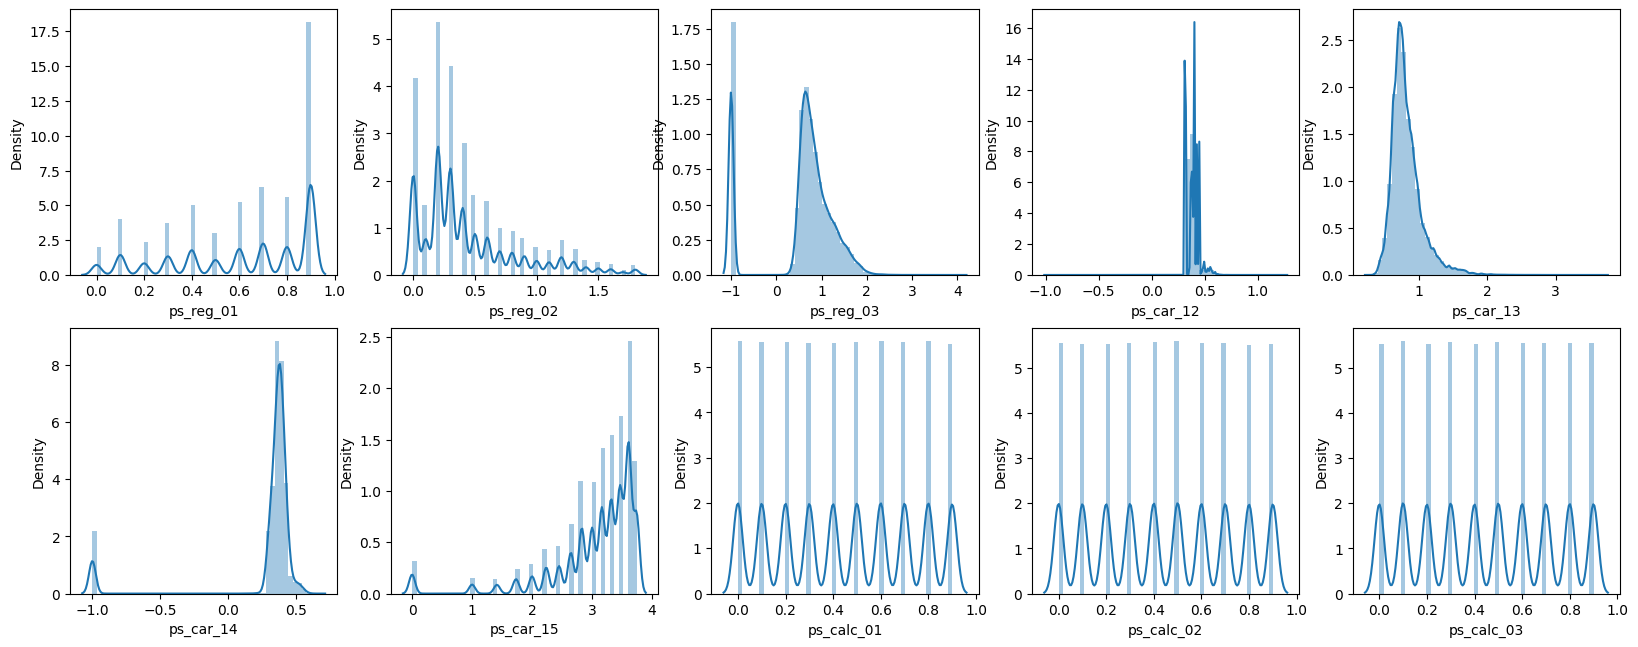

In [13]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_interval:
    ax=plt.subplot(5,5,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

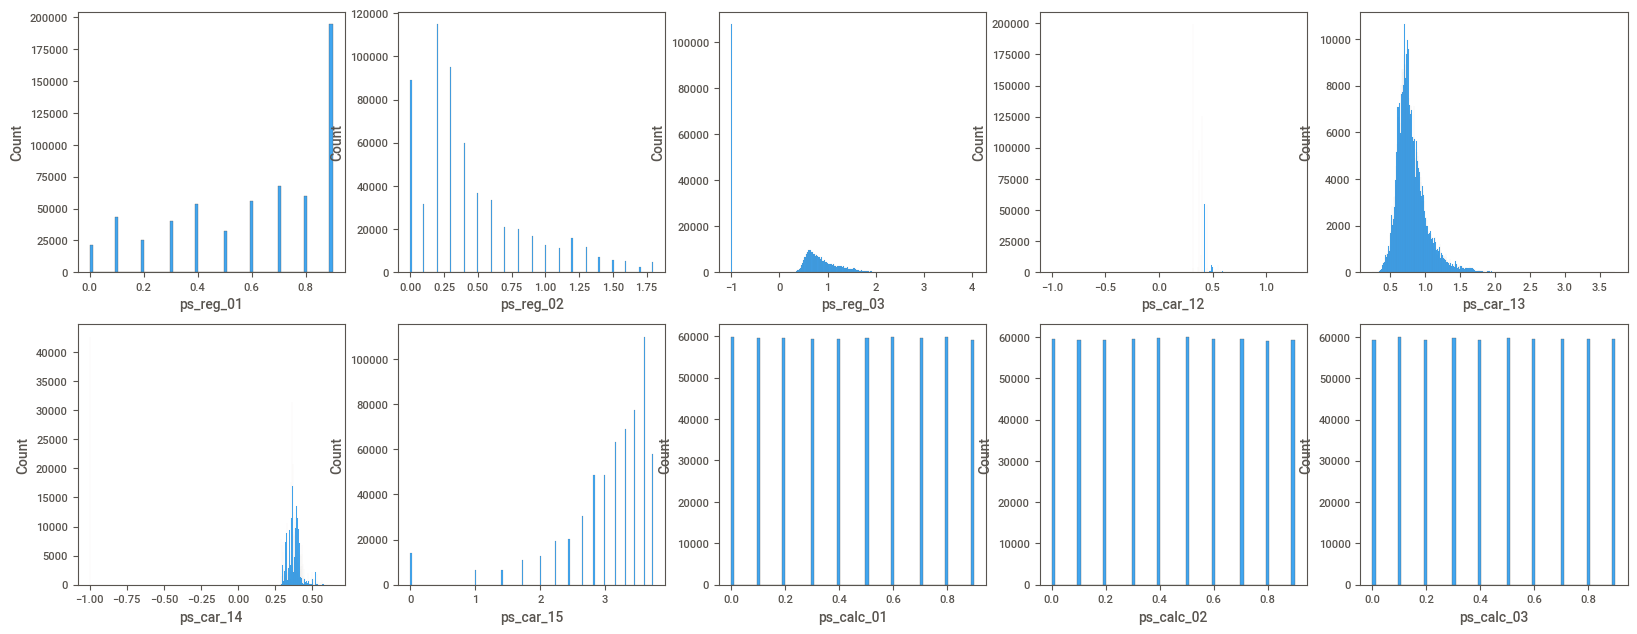

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_interval:
    ax=plt.subplot(5,5,plotnumber)
    sns.histplot(data[i])
    plotnumber+=1
plt.show()

It appears there are some missing values in the ps_reg_03 ps_car_12, ps_car_14 features. (these features have -1 value which seems to be a missing value)

In [ ]:
data['ps_reg_03'].value_counts()

-1.000000    107772
 0.633936       664
 0.602599       637
 0.704894       627
 0.587899       616
              ...  
 1.397990         1
 0.215058         1
 1.620764         1
 1.967073         1
 1.743560         1
Name: ps_reg_03, Length: 5013, dtype: int64

In [15]:
print(107772/595212*100)

18.106489788512327


In [16]:
data.loc[data['ps_reg_03']<0].shape

(107772, 59)

In [17]:
data['ps_reg_03'].mean()

0.5511018410425681

In [18]:
data['ps_reg_03'].median()

0.7206767653

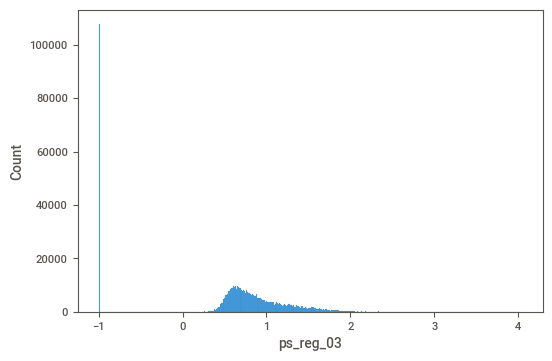

In [ ]:
sns.histplot(data['ps_reg_03'])
plt.show()

In [19]:
#checking for missing values in all the features
vars_with_missing = []

for i in data.columns:
    missings = data[data[i] == -1][i].count()
    if missings > 0:
        vars_with_missing.append(i)
        missings_perc = missings/data.shape[0]

        print('Variable {} has {} records ({:.2%}) with missing values'.format(i, missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


*   Features ps_car_03_cat and ps_car_05_cat has around 50 percent of missing values. Hence, it is ideal to drop these features.
*   ps_reg_03 has 18 percent of missing values. This is a continuous variable. We can impute the missing values in this feature with mean.
*   ps_car_11 and ps_car_12 has 5 & 1 missing records respectively. ps_car_11 is ordinal and ps_car_12 is continouous, so, we can replace these missing records with mode and mean respectively.
*   ps_car_14 has 7 percent missing records. This is continouous variable. So, we can replace the missing values with mean.
*   Rest of the features which contain missing values are categorical. We can replace these with mode.

In [20]:
#dropping features
data.drop(['ps_car_03_cat','ps_car_05_cat'],axis=1,inplace=True) #dropping features with more missing records
meta.loc[['ps_car_03_cat','ps_car_05_cat'],'keep']=False #removing the features from meta data

In [21]:
data[data['ps_car_12']<0]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
298018,744626,0,0,1,6,0,1,0,0,1,...,11,1,0,10,0,0,1,0,0,0


In [22]:
data['ps_car_14'].value_counts()

ps_car_14
-1.000000    42620
 0.361525    17696
 0.358329    15523
 0.361939    11885
 0.368782    11626
             ...  
 0.526783        1
 0.213073        1
 0.603324        1
 0.411461        1
 0.511371        1
Name: count, Length: 850, dtype: int64

In [23]:
data.loc[data['ps_car_14']==-1,'ps_car_14']=data['ps_car_14'].mean()#replacing missing values in ps_car_14 with mean
data['ps_car_14'].value_counts()

ps_car_14
0.276256    42620
0.361525    17696
0.358329    15523
0.361939    11885
0.368782    11626
            ...  
0.526783        1
0.213073        1
0.603324        1
0.411461        1
0.511371        1
Name: count, Length: 850, dtype: int64

In [24]:
data.loc[data['ps_reg_03']==-1,'ps_reg_03']=data['ps_reg_03'].mean()#replacing missing values in ps_reg_03 with mean
data.loc[data['ps_car_12']==-1,'ps_car_12']=data['ps_car_12'].mean()#replacing missing values in ps_car_12 with mean
data.loc[data['ps_car_11']==-1,'ps_car_11']=data['ps_car_11'].mean()#replacing missing values in ps_car_11 with mean

In [25]:
data.loc[data['ps_car_02_cat']==-1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
93772,234713,0,0,1,3,1,0,0,1,0,...,3,1,4,4,0,0,1,0,0,0
167288,418027,0,0,1,1,0,3,1,0,0,...,3,0,0,9,0,1,1,1,0,0
514764,1286199,0,5,1,6,0,0,0,0,0,...,5,3,2,13,0,0,0,1,0,0
547614,1368555,0,1,1,7,0,0,0,0,1,...,8,1,2,14,0,1,1,0,1,0
578003,1445211,0,5,1,8,0,4,1,0,0,...,5,0,1,9,0,1,1,0,0,0


In [26]:

data.loc[data['ps_car_02_cat']==-1,'ps_car_02_cat']=int(data['ps_car_02_cat'].mode())#replacing missing values in ps_car_02_cat with mode
data['ps_car_02_cat'].value_counts()

ps_car_02_cat
1    493995
0    101217
Name: count, dtype: int64

In [27]:
data.loc[data['ps_ind_02_cat']==-1,'ps_ind_02_cat']=int(data['ps_ind_02_cat'].mode())#replacing missing values in ps_ind_02_cat with mode

#Variable ps_ind_04_cat has 83 records (0.01%) with missing values
#Variable ps_ind_05_cat has 5809 records (0.98%) with missing values

In [28]:
data.loc[data['ps_ind_04_cat']==-1,'ps_ind_04_cat']=int(data['ps_ind_04_cat'].mode())#replacing missing values in ps_ind_04_cat with mode
data.loc[data['ps_ind_05_cat']==-1,'ps_ind_05_cat']=int(data['ps_ind_05_cat'].mode())#replacing missing values in ps_ind_05_cat with mode

In [29]:
data['ps_ind_04_cat'].value_counts()

ps_ind_04_cat
0    347048
1    248164
Name: count, dtype: int64

In [30]:
print(data['ps_car_01_cat'].value_counts())
print(data['ps_car_07_cat'].value_counts())
print(data['ps_car_09_cat'].value_counts())

ps_car_01_cat
 11    207573
 7     179247
 6      62393
 10     50087
 4      26174
 9      20323
 5      18142
 8      15093
 3       6658
 0       5904
 2       2144
 1       1367
-1        107
Name: count, dtype: int64
ps_car_07_cat
 1    553148
 0     30575
-1     11489
Name: count, dtype: int64
ps_car_09_cat
 2    353482
 0    194518
 1     29080
 3     14756
 4      2807
-1       569
Name: count, dtype: int64


In [31]:
data.loc[data['ps_car_01_cat']==-1,'ps_car_01_cat']=int(data['ps_car_01_cat'].mode())#replacing missing values in ps_car_01_cat with mode
data.loc[data['ps_car_07_cat']==-1,'ps_car_07_cat']=int(data['ps_car_07_cat'].mode())#replacing missing values in ps_car_07_cat with mode
data.loc[data['ps_car_09_cat']==-1,'ps_car_09_cat']=int(data['ps_car_09_cat'].mode())#replacing missing values in ps_car_09_cat with mode

In [32]:
print(data['ps_car_01_cat'].value_counts())
print(data['ps_car_07_cat'].value_counts())
print(data['ps_car_09_cat'].value_counts())

ps_car_01_cat
11    207680
7     179247
6      62393
10     50087
4      26174
9      20323
5      18142
8      15093
3       6658
0       5904
2       2144
1       1367
Name: count, dtype: int64
ps_car_07_cat
1    564637
0     30575
Name: count, dtype: int64
ps_car_09_cat
2    354051
0    194518
1     29080
3     14756
4      2807
Name: count, dtype: int64


**Bivariate Analysis**

In [33]:
data_nominal=meta[(meta.level=='nominal') & (meta.keep==True)].index
data_nominal

Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11'],
      dtype='object', name='varname')

In [34]:
data[data_nominal].describe()

,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.359668,4.423318,0.416934,0.414948,8.298090,0.829948,0.725192,6.555340,0.948632,0.832080,1.331757,0.992136,62.215674,2.346100
std,0.663108,2.699902,0.493052,1.344050,2.505433,0.375679,2.153463,5.501445,0.220748,0.373796,0.976311,0.091619,33.012455,0.832491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,7.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000
50%,1.000000,4.000000,0.000000,0.000000,7.000000,1.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000
75%,2.000000,6.000000,1.000000,0.000000,11.000000,1.000000,0.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000,3.000000
max,4.000000,11.000000,1.000000,6.000000,11.000000,1.000000,9.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000,3.000000


In [35]:
np.std(data[data_nominal])<0.1

ps_ind_02_cat    False
ps_ind_03        False
ps_ind_04_cat    False
ps_ind_05_cat    False
ps_car_01_cat    False
ps_car_02_cat    False
ps_car_04_cat    False
ps_car_06_cat    False
ps_car_07_cat    False
ps_car_08_cat    False
ps_car_09_cat    False
ps_car_10_cat     True
ps_car_11_cat    False
ps_car_11        False
dtype: bool

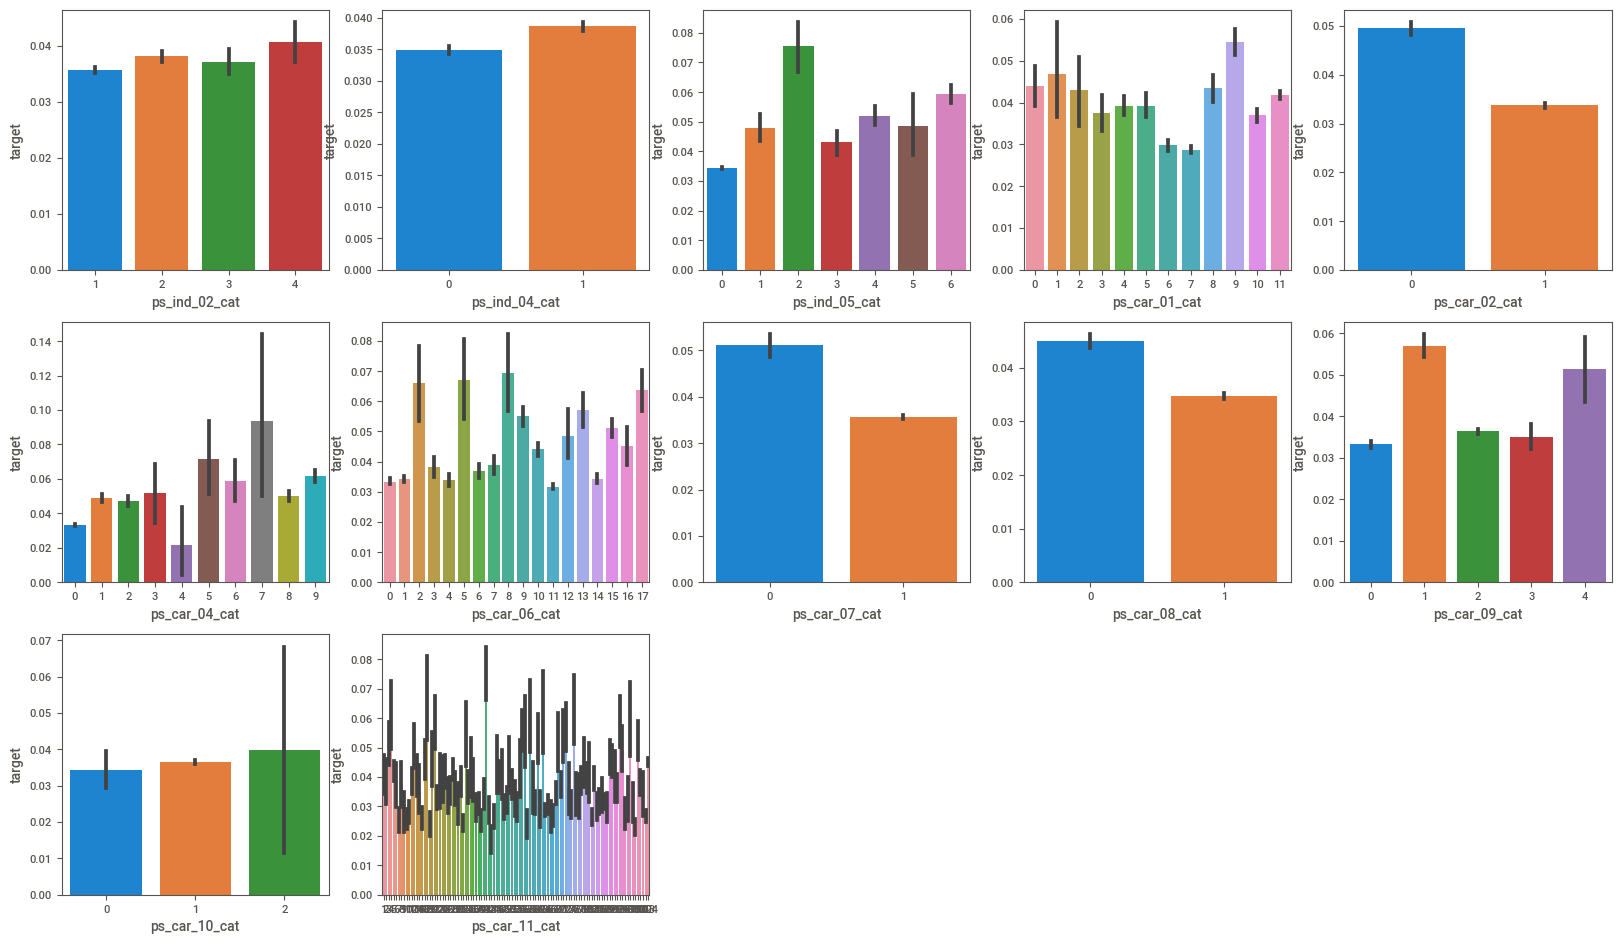

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_nominal:
    ax=plt.subplot(5,5,plotnumber)
    sns.barplot(data[i],data['target'])
    plotnumber+=1
plt.show()

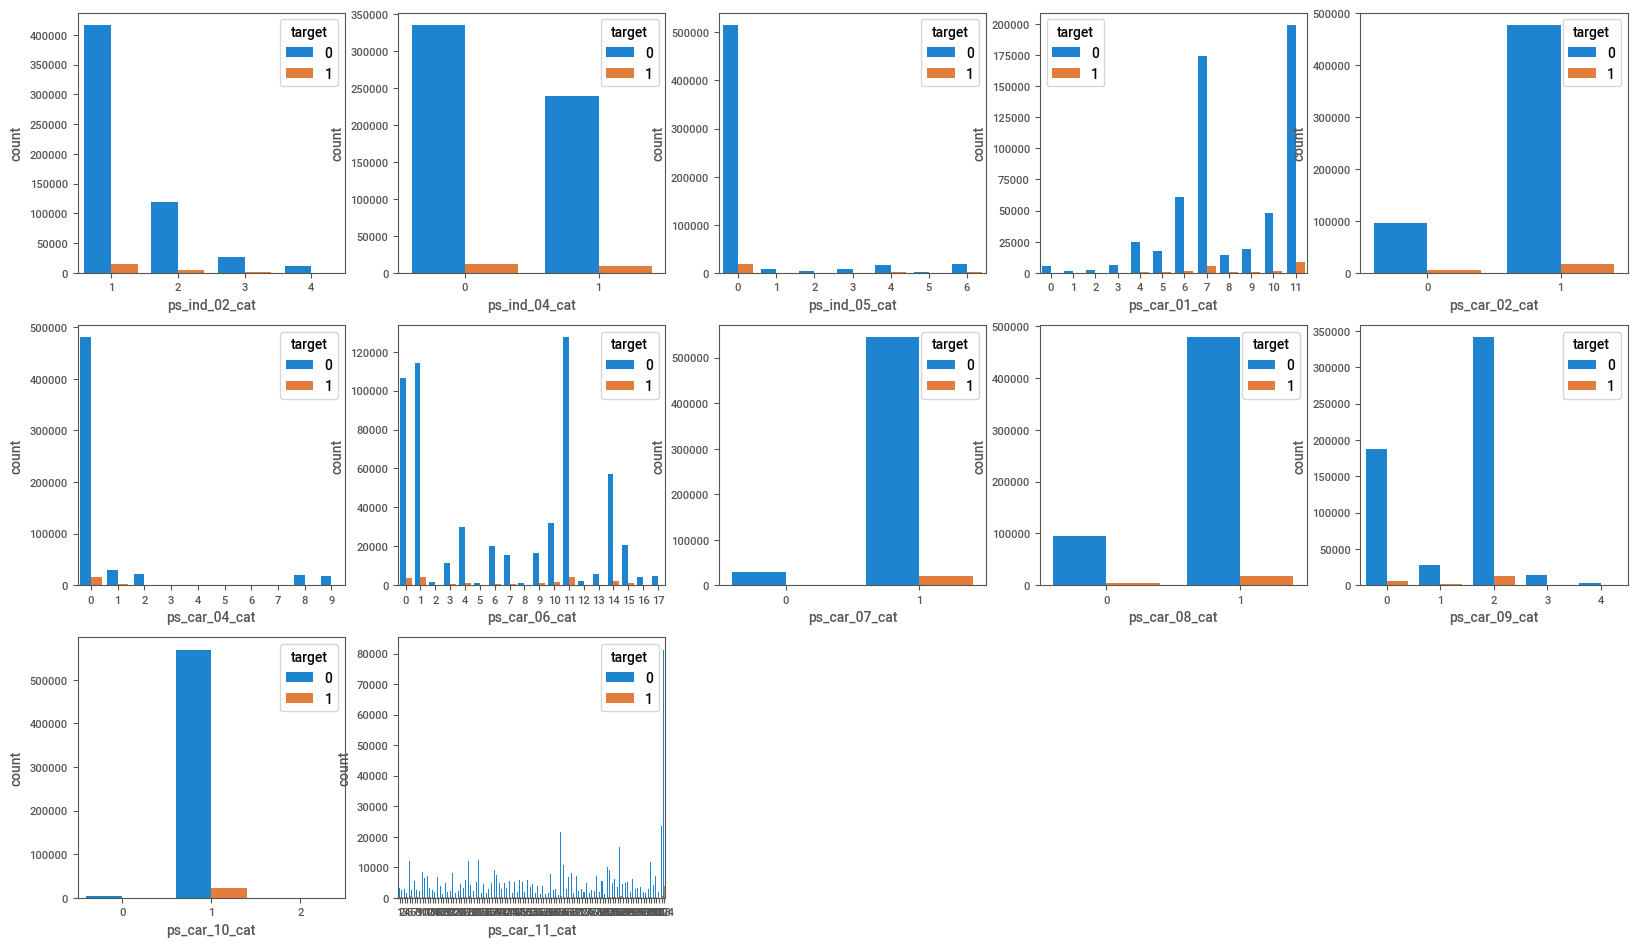

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_nominal:
    ax=plt.subplot(5,5,plotnumber)
    sns.countplot(x=data[i],hue=data['target'])
    plotnumber+=1
plt.show()

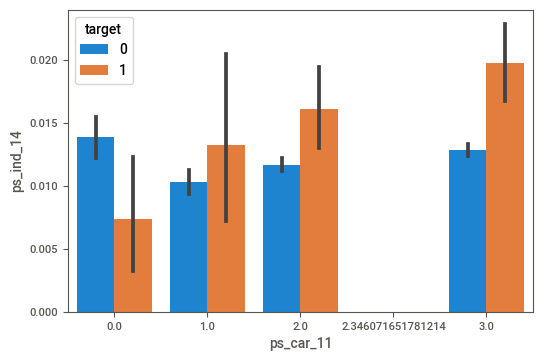

In [ ]:
sns.barplot(x=data['ps_car_11'],y=data['ps_ind_14'],hue=data['target'])
plt.show()

In [36]:
data_bin=meta[(meta.level=='binary') & (meta.keep)].index
data_bin

Index(['target', 'ps_ind_01', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object', name='varname')

In [37]:
data[data_bin].describe()

,target,ps_ind_01,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,...,7.299922,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,...,3.546042,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
np.std(data[data_bin])<0.1

target            False
ps_ind_01         False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin      True
ps_ind_11_bin      True
ps_ind_12_bin      True
ps_ind_13_bin      True
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_calc_15_bin    False
ps_calc_16_bin    False
ps_calc_17_bin    False
ps_calc_18_bin    False
ps_calc_19_bin    False
ps_calc_20_bin    False
dtype: bool

In [39]:
np.std(data[data_interval])<0.1

ps_reg_01     False
ps_reg_02     False
ps_reg_03     False
ps_car_12      True
ps_car_13     False
ps_car_14      True
ps_car_15     False
ps_calc_01    False
ps_calc_02    False
ps_calc_03    False
ps_calc_04    False
ps_calc_05    False
ps_calc_06    False
ps_calc_07    False
ps_calc_08    False
ps_calc_09    False
ps_calc_10    False
ps_calc_11    False
ps_calc_12    False
ps_calc_13    False
ps_calc_14    False
dtype: bool

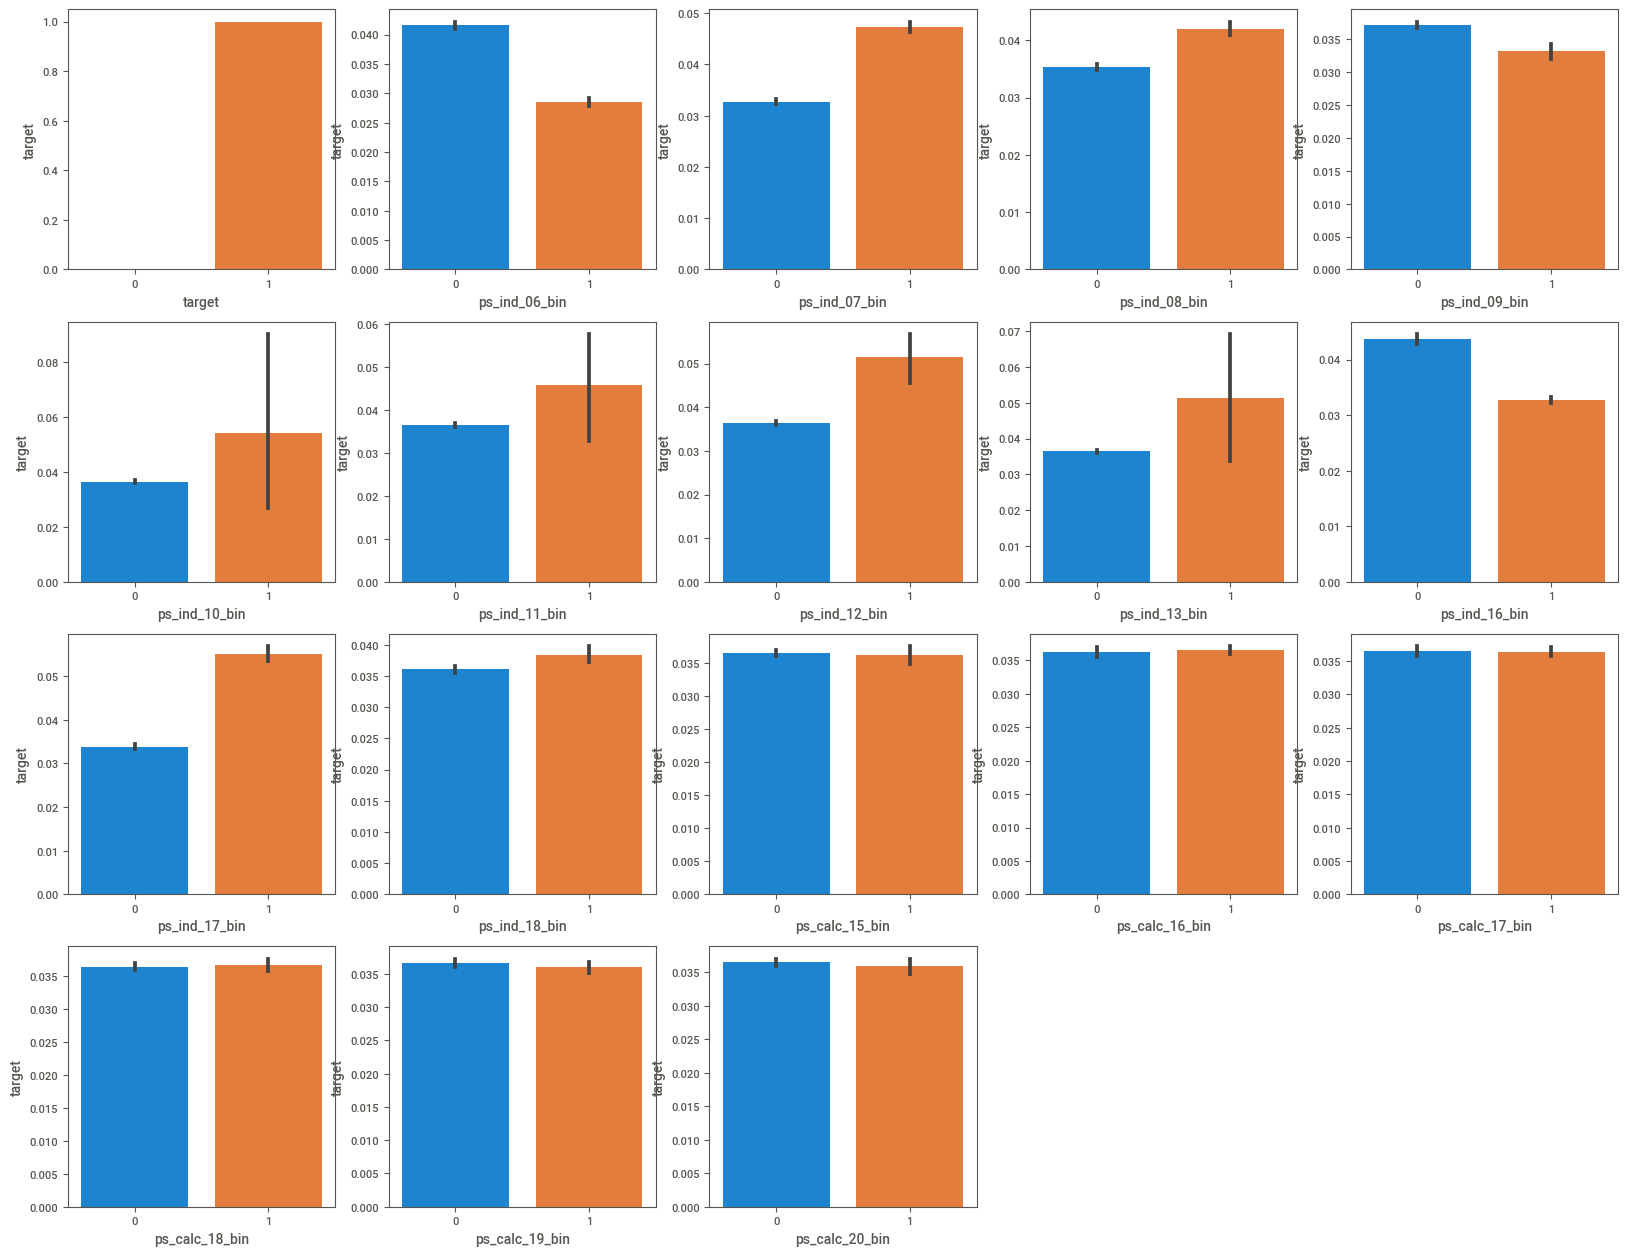

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_bin:
  ax=plt.subplot(5,5,plotnumber)
  sns.barplot(data[i],data['target'])
  plotnumber+=1
plt.show()

In [ ]:
#checking for outliers in the data

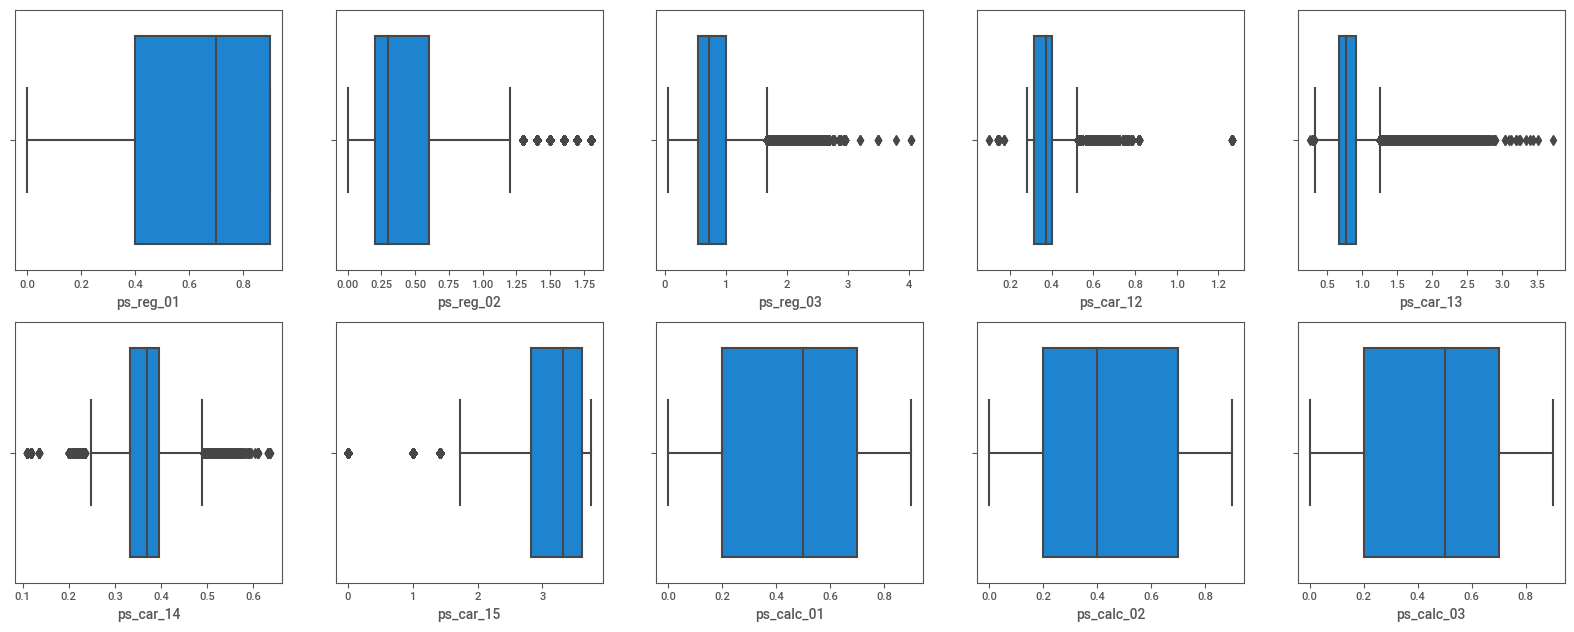

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_interval:
  ax=plt.subplot(5,5,plotnumber)
  sns.boxplot(data[i])
  plotnumber+=1
plt.show()

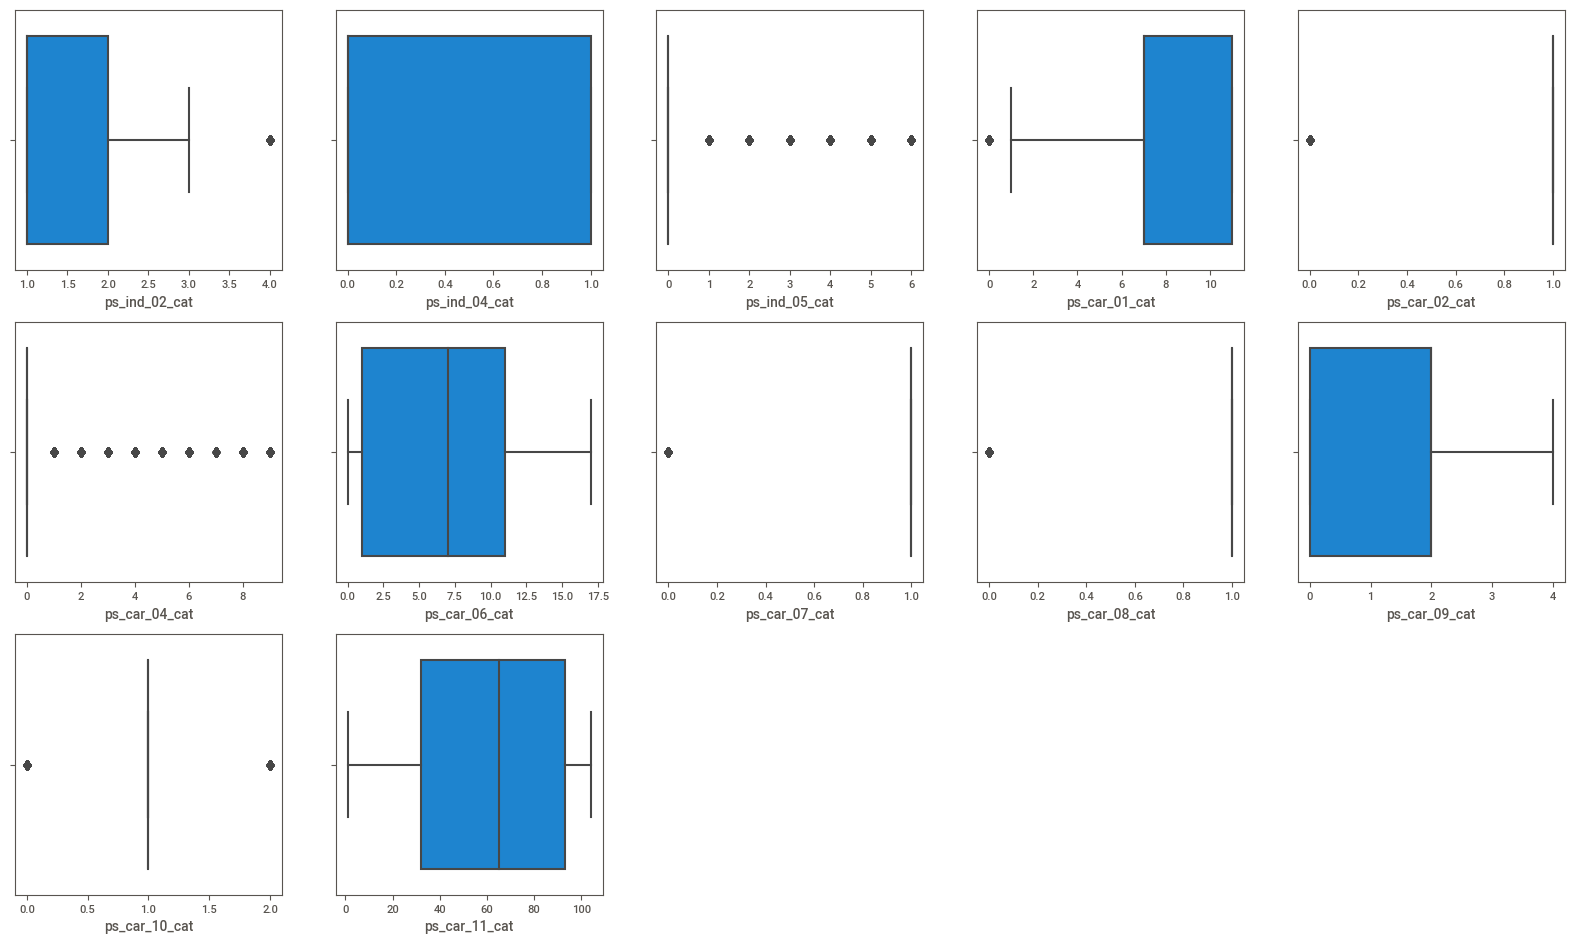

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_nominal:
  ax=plt.subplot(5,5,plotnumber)
  sns.boxplot(data[i])
  plotnumber+=1
plt.show()

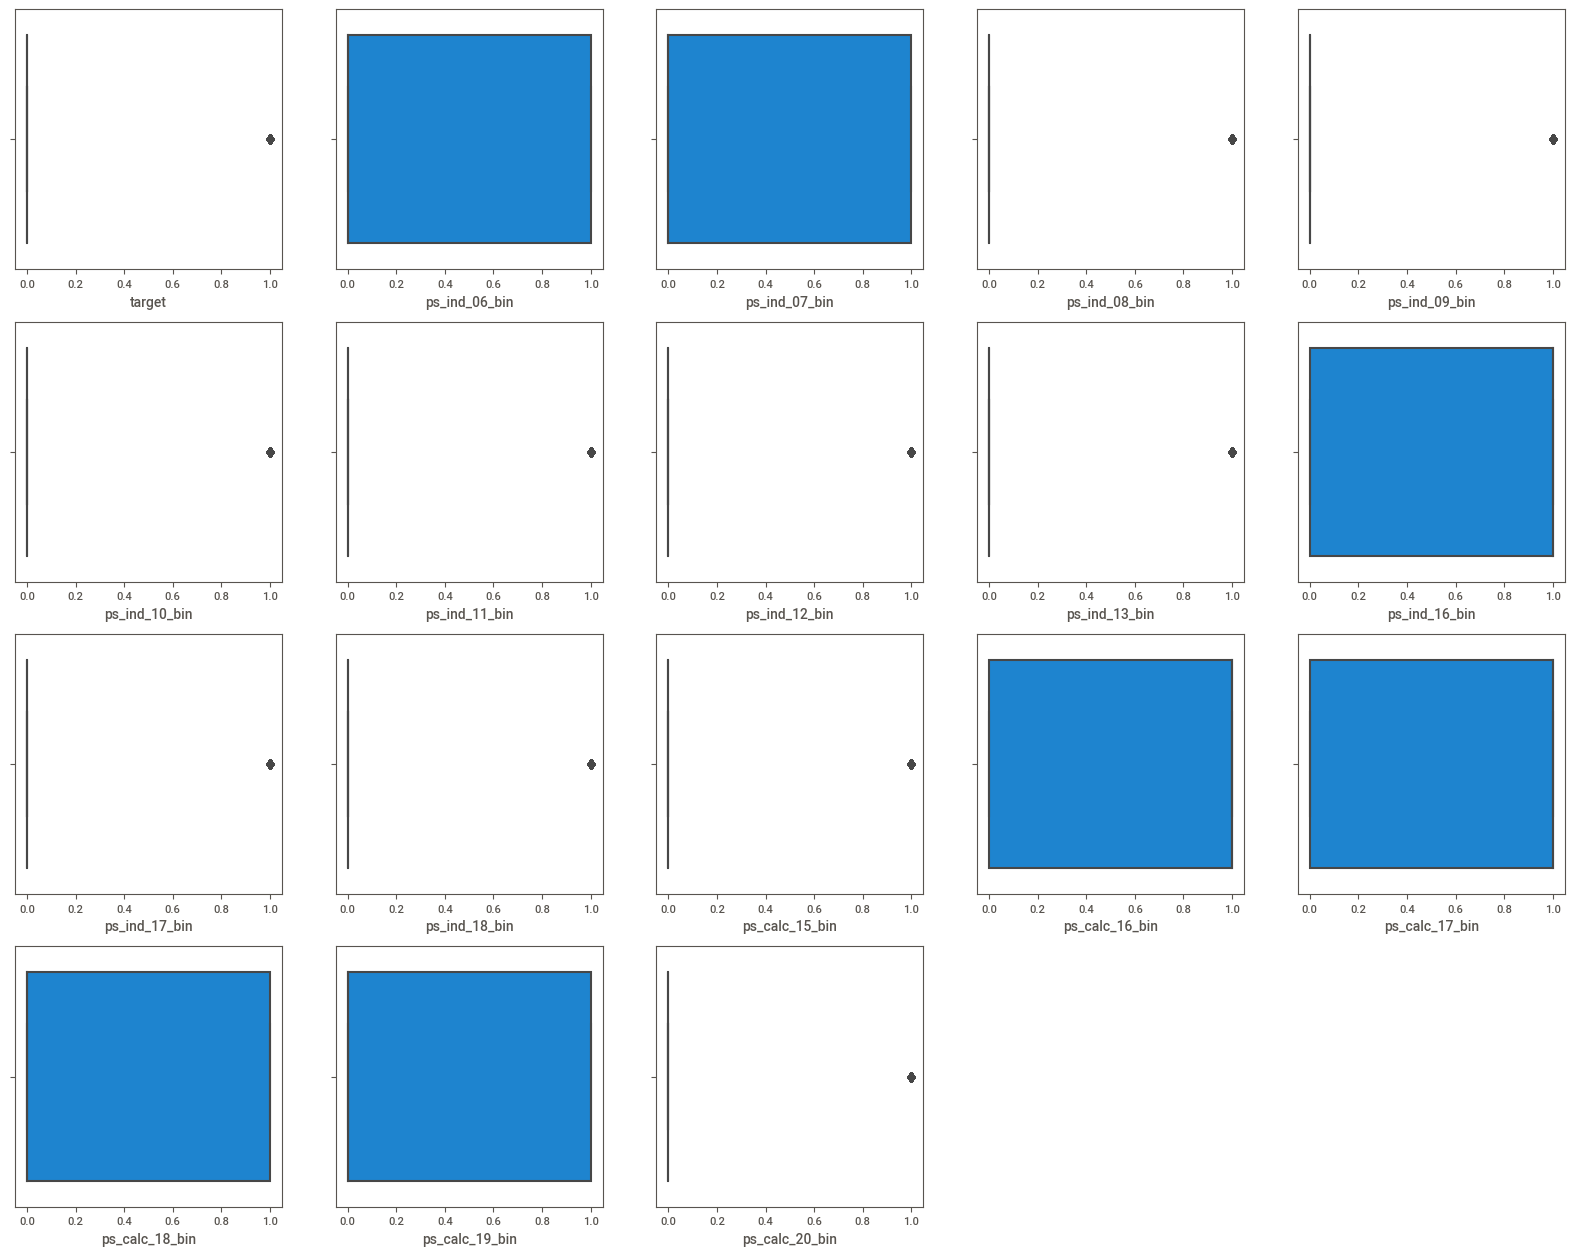

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_bin:
  ax=plt.subplot(5,5,plotnumber)
  sns.boxplot(data[i])
  plotnumber+=1
plt.show()

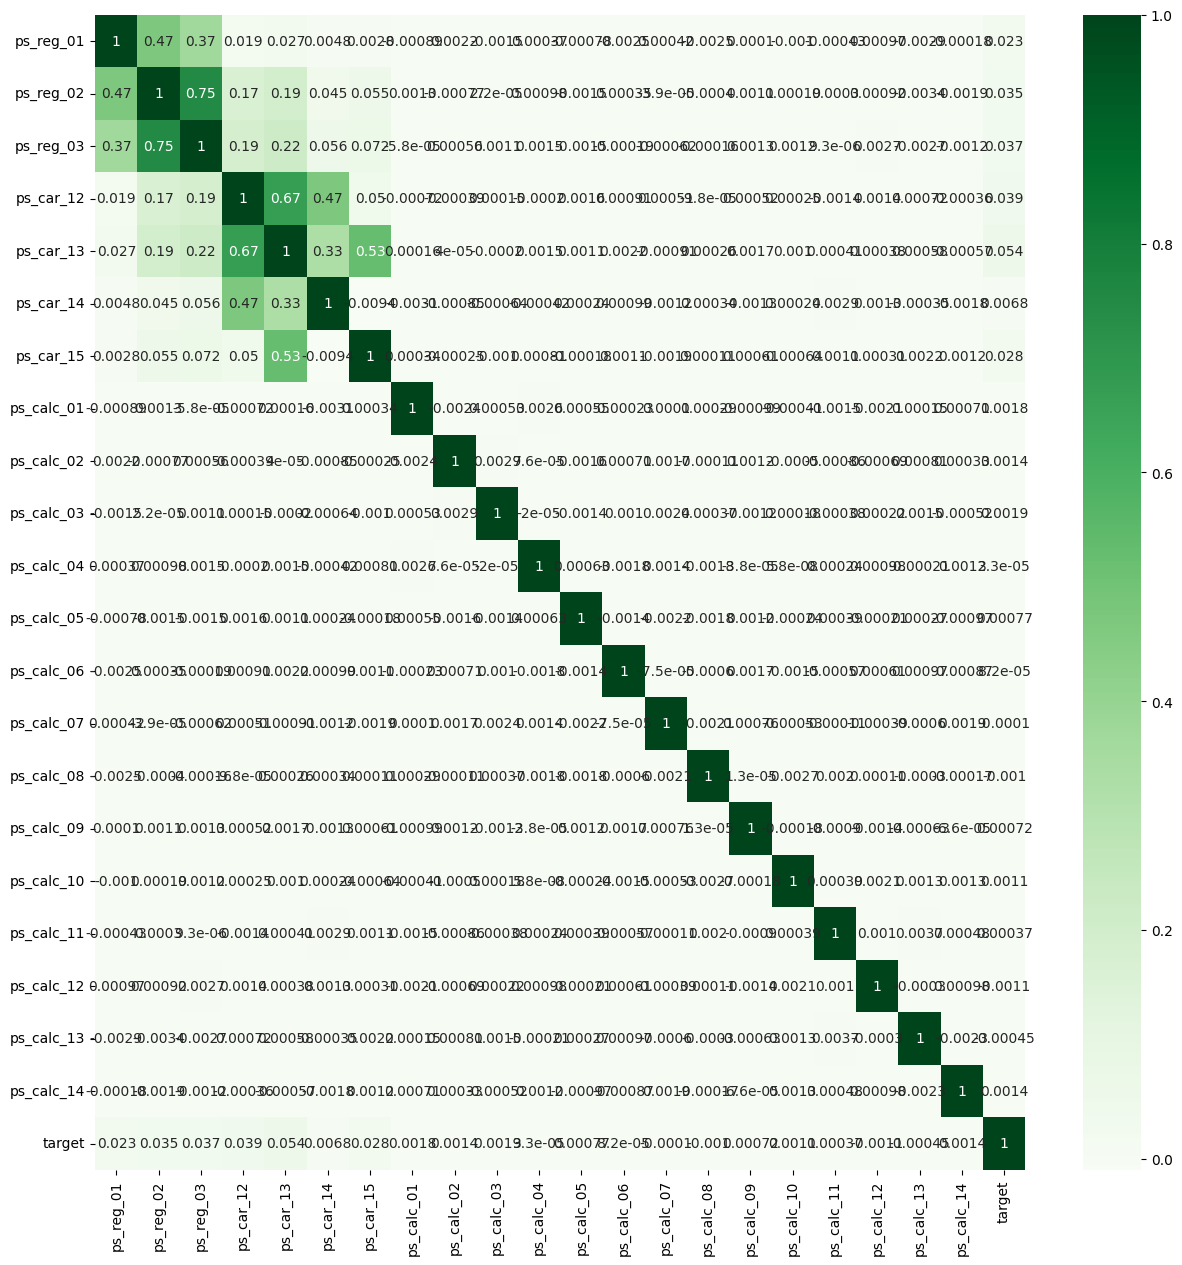

In [40]:
#finding out the correlation
data_int_corr=data[data_interval]
data_int_corr['target']=data['target']
plt.figure(figsize=(15,15))
sns.heatmap(data_int_corr.corr(),annot=True,cmap="Greens")
plt.show()


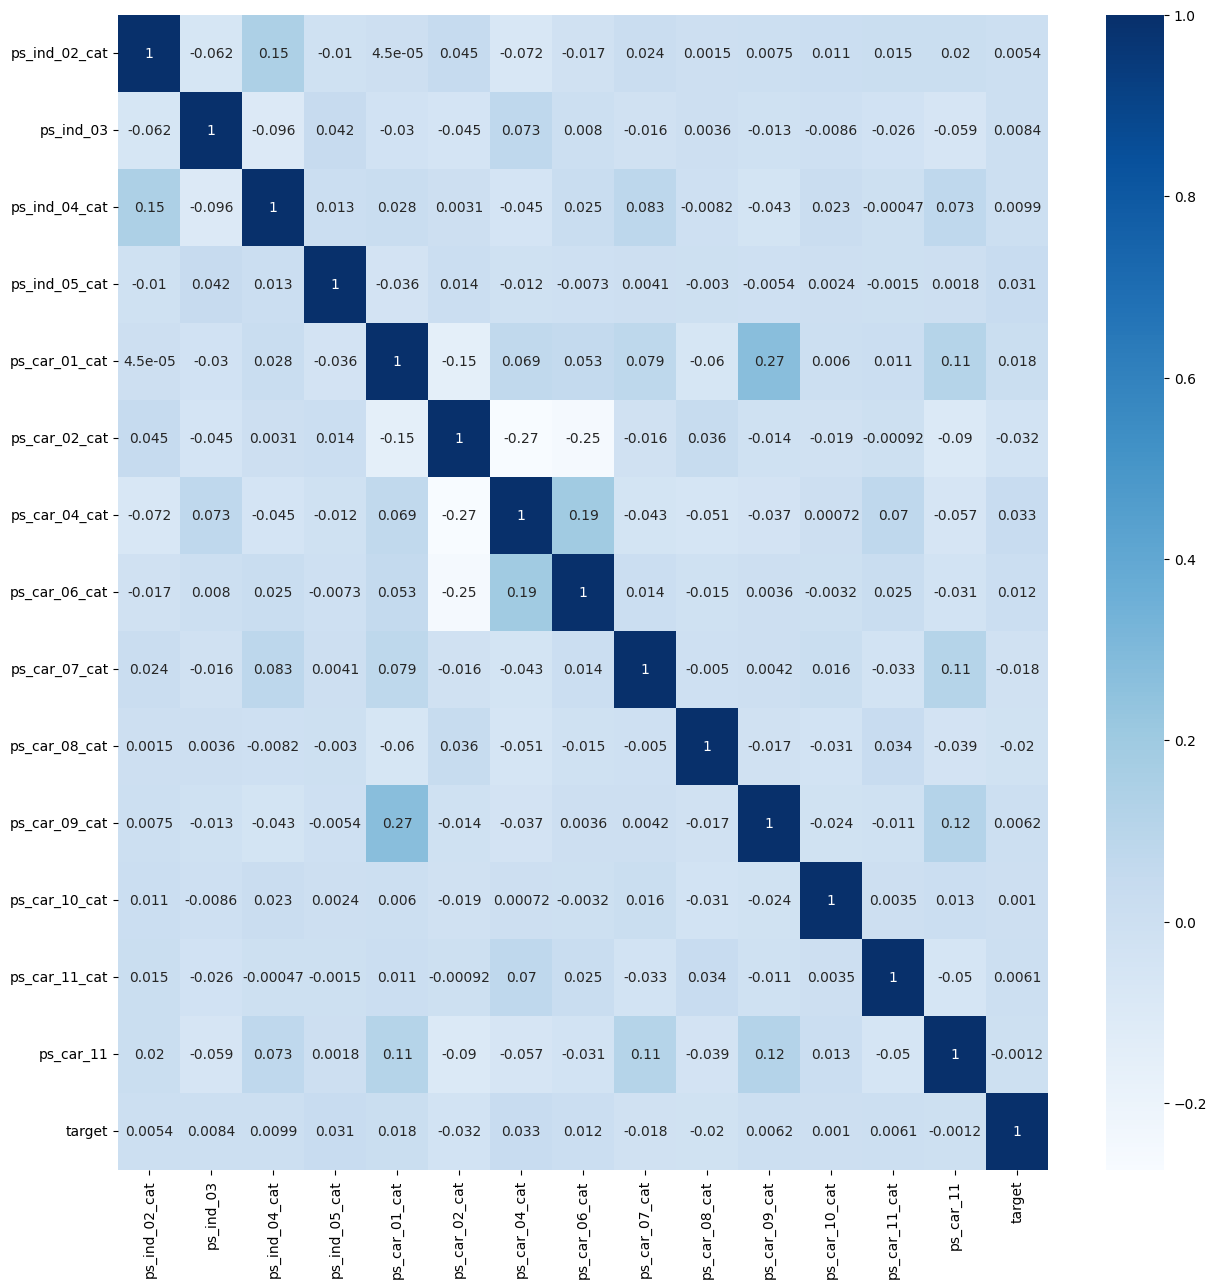

In [41]:
data_nom_corr=data[data_nominal]
data_nom_corr['target']=data['target']
plt.figure(figsize=(15,15))
sns.heatmap(data_nom_corr.corr(),annot=True,cmap="Blues")
plt.show()

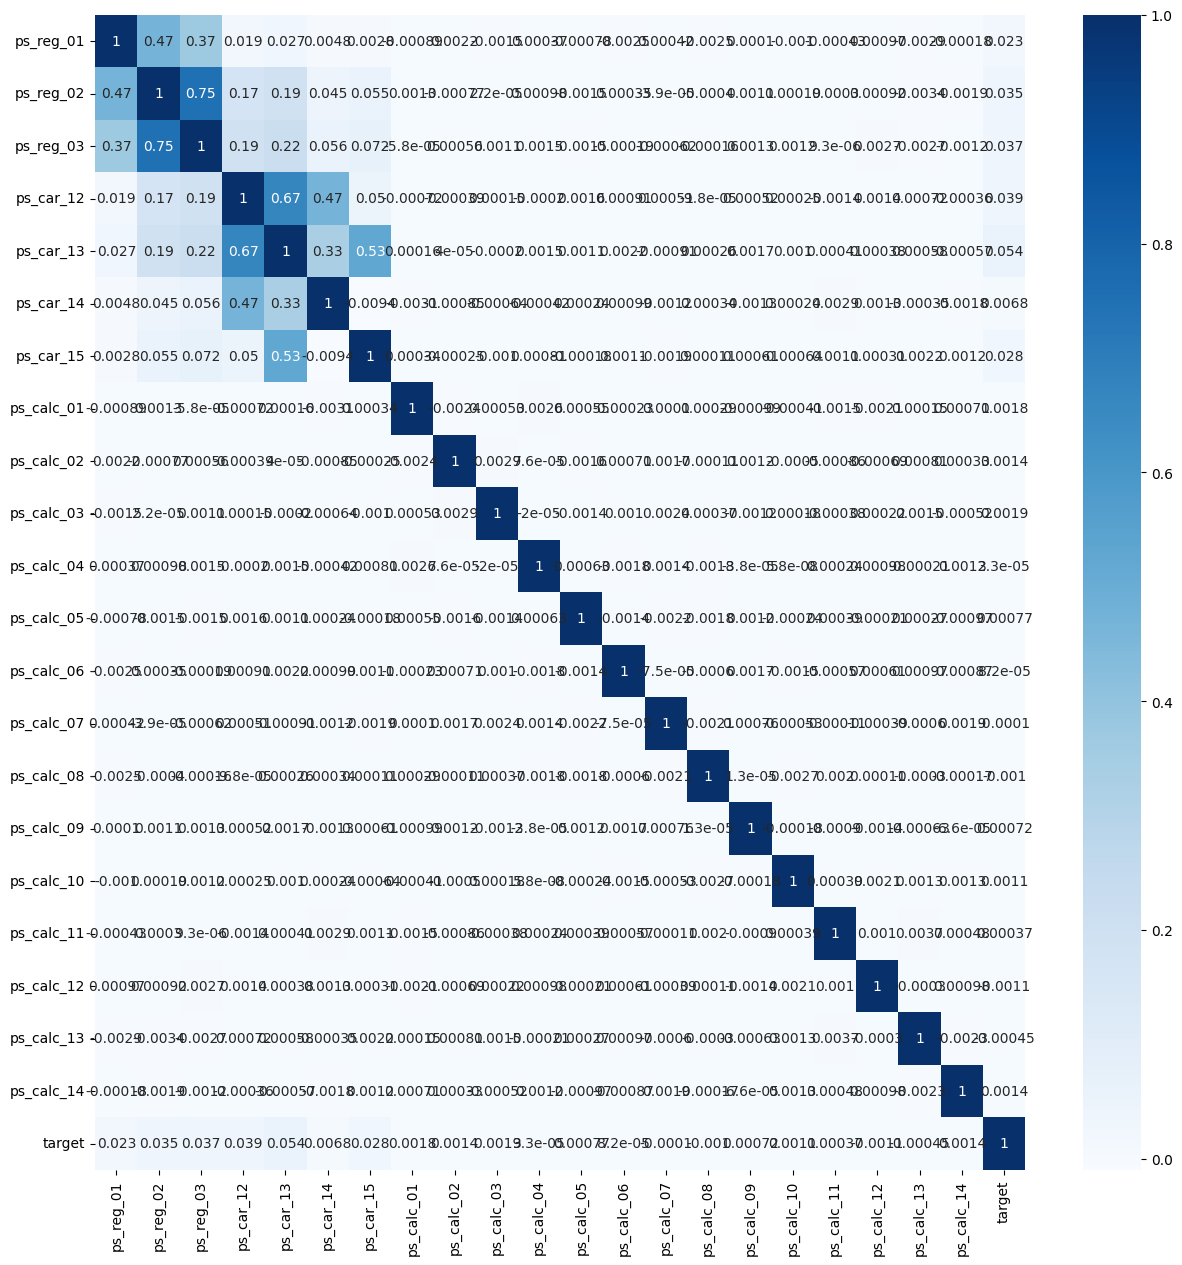

In [42]:
data_bin_corr=data[data_interval]
data_bin_corr['target']=data['target']
plt.figure(figsize=(15,15))
sns.heatmap(data_bin_corr.corr(),annot=True,cmap="Blues")
plt.show()

After performing the Univariate and Bivariate analysis, there are no features that are most highly correlated with the target variable(over 0.9). Also, there are some featues which are less correlated with target variable.

ps_car_12, ps_car_10_cat, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, these featues have standard deviation less than 0.1

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

**Not scaling the data because of not using distance based algorithms which requires scaling.**

## Model 1: Logistic Regression

In [45]:
X=data.drop(['id','target'],axis=1)
y=data['target']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_test_pred=lr.predict(X_test)

In [49]:
accuracy_score(y_test,y_test_pred)

0.9631645707853465

In [50]:
y_train_pred=lr.predict(X_train)

In [51]:

accuracy_score(y_train,y_train_pred)

0.9636494605906727

Model 1 is giving 96 percent accuracy on train & test data. However, as the data is biased, it is ideal to balance the target data and create a new model.

In [52]:
X=data.drop(['id','target',"ps_car_12",'ps_car_10_cat','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin'],axis=1)
y=data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_test_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
y_train_pred=lr.predict(X_train)
print(accuracy_score(y_train,y_train_pred))

0.9631645707853465
0.9636494605906727


#dropping the featues with standard deviation less than 0.1 did not improve the accuracy

In [ ]:
#as the target data is biased, let us balance the target data and applying the algorithm

In [53]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({0: 573518, 1: 21694})
Counter({0: 573518, 1: 573518})


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [55]:
lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_test_pred=lr.predict(X_test)

In [57]:
accuracy_score(y_test,y_test_pred)

0.8644946994001953

In [58]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    114915
           1       0.89      0.84      0.86    114493

    accuracy                           0.86    229408
   macro avg       0.87      0.86      0.86    229408
weighted avg       0.87      0.86      0.86    229408



In [59]:
pd.crosstab(y_test,y_test_pred)

col_0,0,1
target,,
0,102485,12430
1,18656,95837


Accuracy of model 1 is dropped to 86 percent after balancing the data. Hence, this model appears to be not very efficient.

## Model 2: Decision Tree

In [60]:
#model number2

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
y_test_hat=dt.predict(X_test)
accuracy_score(y_test,y_test_hat)

0.9430098340075325

In [63]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    114915
           1       0.93      0.96      0.94    114493

    accuracy                           0.94    229408
   macro avg       0.94      0.94      0.94    229408
weighted avg       0.94      0.94      0.94    229408



In [64]:
y_train_hat=dt.predict(X_train)

In [65]:
accuracy_score(y_train,y_train_hat)

1.0

In [66]:
print(classification_report(y_train,y_train_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    458603
           1       1.00      1.00      1.00    459025

    accuracy                           1.00    917628
   macro avg       1.00      1.00      1.00    917628
weighted avg       1.00      1.00      1.00    917628



In [67]:
#from sklearn import tree
#plt.figure(figsize=(20,14))
#tree.plot_tree(dt,filled=True,fontsize=14)


In [68]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    114915
           1       0.93      0.96      0.94    114493

    accuracy                           0.94    229408
   macro avg       0.94      0.94      0.94    229408
weighted avg       0.94      0.94      0.94    229408



In [69]:
pd.crosstab(y_test,y_test_hat)

col_0,0,1
target,,
0,106966,7949
1,5125,109368


**Model 2, Decision Tree is overfitting as the accuracy of train data is 100 percent and the accuracy on test data is 94 percent.**

In [56]:
X=data.drop(['id','target',"ps_car_12",'ps_car_10_cat','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin'],axis=1)
y=data['target']
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_test_hat=dt.predict(X_test)
print(accuracy_score(y_test,y_test_hat))
y_train_hat=dt.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

Counter({0: 573518, 1: 21694})
Counter({0: 573518, 1: 573518})
0.9433454805412191
1.0


# Removing the features with less standard deviation did not impact the performance

#Hyperparameter tuning
Performing the hyperparameter turning to deal with overfitting and improve the model efficiency

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = RandomizedSearchCV(tree_clf, params, n_jobs=-1, cv=5)

In [ ]:
tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 19, 'criterion': 'entropy'})


In [ ]:
#Bestparamters: ({'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})
Bestparamters: ({'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 18, 'criterion': 'entropy'})



In [ ]:
tree_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_depth': 19,
 'criterion': 'entropy'}

In [ ]:
tree_cv.best_score_

0.939599707901723

In [ ]:
dt1=DecisionTreeClassifier(splitter= 'best',
 min_samples_split=2,
 min_samples_leaf=6,
 max_depth=19,
 criterion= 'entropy')

In [ ]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=6)

In [ ]:
y_test_hat=dt1.predict(X_test)

In [ ]:
accuracy_score(y_test_hat,y_test)

0.9414013460733714

In [ ]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94    114915
           1       0.95      0.93      0.94    114493

    accuracy                           0.94    229408
   macro avg       0.94      0.94      0.94    229408
weighted avg       0.94      0.94      0.94    229408



In [ ]:
y_train_hat=dt1.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_hat))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    458603
           1       0.97      0.94      0.96    459025

    accuracy                           0.96    917628
   macro avg       0.96      0.96      0.96    917628
weighted avg       0.96      0.96      0.96    917628



**After performing the hyperparameter tuning, train accuracy is dropped to 96 percent. Hence, the model is optimal and efficient now.**

# Model 3 applying random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
y_test_predict=rf_clf.predict(X_test)

In [72]:
accuracy_score(y_test,y_test_predict)

0.9776075812526154

In [73]:
y_train_predict=rf_clf.predict(X_train)

In [74]:
accuracy_score(y_train,y_train_predict)

0.9999934614026599

**Test accuracy of Random forest is 97 percent and train accuracy of Random forest is 99 percent. However, computational power is not sufficient to perform the hyper parameter turning to make the model mode efficient.
Hence, sticking with the Decision Tree model, as it is providing better accuracy, time-efficiency, and easy interpretability.**

In [76]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [77]:
y_hatXgb=xgb_r.predict(X_test)

In [78]:
print(classification_report(y_test,y_hatXgb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114915
           1       1.00      0.96      0.98    114493

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



In [79]:
accuracy_score(y_test,y_hatXgb)

0.9807591714325569

In [80]:
y_trainXgb=xgb_r.predict(X_train)

In [81]:
accuracy_score(y_train,y_trainXgb)

0.9811448648036023

 **Test accuracy of XGB is 98 percent and train accuracy of Random forest is 98 percent. However, computational power is not sufficient to perform the hyper parameter turning to make the model mode efficient. Hence, sticking with the XGB model, as it is providing better accuracy, time-efficiency, and easy interpretability.**

### ------------------------------------------------------------------------------------------------------------------------

## Conclusion

# Task 1

## Model creation
We built 4 predictive models

1, Logistic Regression

2, Decision Tree

3, Random Forest

4, XGBoosting

After evaluating the multiple models we are getting the highest accuracy of **98%** and f1 score of **98%** for **XGB Classifier**  model.

So we are concluding that XGB  predictive model  will help the insurance marketing team
to know which customer will buy the product.

# Task 2

1. Personalized Recommendations

Custom Policy Suggestions: Use machine learning to analyze customer data and recommend insurance products that best fit their needs and preferences.
Dynamic Pricing Models: Implement personalized pricing based on risk assessment and customer behavior analysis.

2. Targeted Marketing Campaigns

Segmented Advertising: Create targeted marketing campaigns based on customer segments identified through machine learning models. For instance, tailor messages and offers to high-value segments or those showing higher purchase intent.
Predictive Ad Spend: Optimize ad spend by predicting which channels and messages will yield the highest conversion rates.

3. Behavioral Triggers

Automated Alerts: Set up automated alerts or notifications for customers showing signs of interest or behavior indicating readiness to purchase (e.g., frequent visits to the policy comparison page).
Abandoned Cart Recovery: Implement strategies to follow up with users who start but do not complete the application process, possibly through targeted emails or retargeting ads.

4. Enhanced Customer Segmentation

Refined Customer Profiles: Use clustering algorithms to segment customers more effectively, allowing for more precise marketing and product development strategies.
Lifecycle Stage Targeting: Develop strategies tailored to different stages of the customer lifecycle, from acquisition to renewal.

5. Optimized Product Offerings

Feature Analysis: Identify which features or benefits of the insurance products are most attractive to different customer segments and highlight those in marketing materials.
Product Development: Use customer insights to inform the development of new insurance products or the enhancement of existing ones.

6. Improved Customer Engagement

Chatbots and Virtual Assistants: Implement AI-driven chatbots to provide instant answers to customer queries, assist with policy selection, and guide users through the purchase process.
Personalized Communication: Use natural language processing to tailor email and messaging content based on individual customer interests and previous interactions.

7. Efficient Sales Strategies

Lead Scoring: Use machine learning models to score leads based on their likelihood to convert, allowing sales teams to prioritize high-potential prospects.
Sales Optimization: Analyze historical sales data to determine the most effective sales strategies and tactics for different customer segments.

8. Predictive Analytics

Customer Churn Prevention: Identify customers at risk of discontinuing their policies and proactively offer retention incentives or personalized outreach.
Upsell and Cross-Sell Opportunities: Use predictive models to recommend additional products or upgrades based on customer profiles and behavior.

9. Enhanced Claim Process

Fraud Detection: Implement fraud detection algorithms to minimize fraudulent claims and reduce associated costs.
Streamlined Processing: Use machine learning to predict claim volumes and optimize resource allocation for faster processing and customer satisfaction.

10. Feedback Loop Integration

Continuous Improvement: Continuously gather and analyze feedback on customer experiences with products and services, using this data to refine models and strategies.

### There are some of challenges that as a team we face are :

1) Poor Quality of Data : It was very difficult for us to do the data preprocessing since the actual column names were not mentioned.So we assumed that the columns which have cat as a suffix as categorical and reg as contionus values and bin as binary values.

2) Slow process : The machine learning models are highly efficient in providing accurate results, but it takes a tremendous amount of time.At the time of exploratory data analysis process it take lot of time when analyse bivariate and multivariate analysis. So to overcome this issue we did bivariate analysis of relevent featues only.

3) Underfitting of Training Data : This process occurs when data is unable to establish an accurate relationship between input and output variables.It signifies the data is too simple to establish a precise relationship. To overcome this issue: Maximize the training time,add relevent features to the data, increasing the training time of model.

4) Overfitting of Training Data : Overfitting refers to ML model trained with a massive amount of data that negatively affect its performance. We can tackle this issue by:Analyzing the data with perfection, remove outliers in the training set, remove unwanted feature. For particular agency_name their will be unique agency_code, so we are droping agency_name and also We dropped last name, first name, MI and emp_date because these are not relevent features for our model creation.